## Imports

In [1]:
## Necessary Imports
from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import seaborn as sns
sns.set()

In [4]:
PATH = "kaggle\\house\\"

In [5]:
!dir {PATH}

 Volume in drive D is Local Disk
 Volume Serial Number is B408-A348

 Directory of D:\Github\fastai\courses\ml1\kaggle\house

22-Jan-18  10:16 PM    <DIR>          .
22-Jan-18  10:16 PM    <DIR>          ..
22-Jan-18  10:13 PM           451,405 test (1).csv
22-Jan-18  10:13 PM           460,676 train (1).csv
               2 File(s)        912,081 bytes
               2 Dir(s)  188,194,402,304 bytes free


## Basic Dataset Analysis

In [6]:
df_raw = pd.read_csv(f'{PATH}Train (1).csv', low_memory=False)

In [7]:
df_raw.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

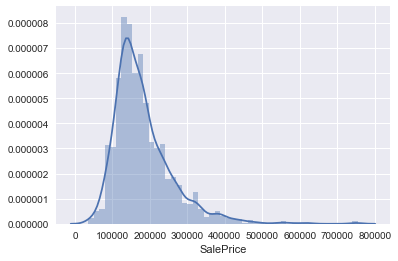

In [8]:
## Get A Quick Overview of What We Are Dealing With
sns.distplot(df_raw['SalePrice']);

In [9]:
#skewness and kurtosis is Clearly Visible via this
print("Skewness: %f" % df_raw['SalePrice'].skew())
print("Kurtosis: %f" % df_raw['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


In [24]:
df_raw['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


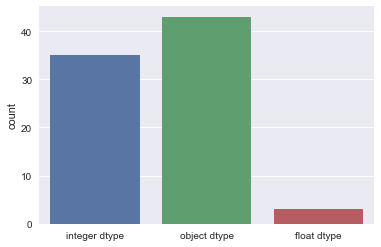

In [10]:
def disply_dtype_plot(df = None):
    if df is None:
        return
    l = []
    cols = df.columns
    for i in cols:
        if df[i].dtype == 'int64':
            l.append('integer dtype')
        elif df[i].dtype == 'object':
            l.append('object dtype')
        elif df[i].dtype == 'float64':
            l.append('float dtype')
        else:
            pass
    sns.countplot(l)
    del l
disply_dtype_plot(df_raw)

In [52]:
def print_feature(alg,printFeatureImportance=True):
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors = df.columns).sort_values(ascending=False)
        plt.figure(figsize=(20,20))
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')

In any sort of data science work, it's important to look at your data, to make sure you understand the format, how it's stored, what type of values it holds, etc. Even if you've read descriptions about your data, the actual data may not be what you expect

In [11]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000): 
        with pd.option_context("display.max_columns", 1000): 
            display(df)

In [12]:
display_all(df_raw.tail())

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


A lot of columns are here in this dataset, So a lot of FUN....

In [13]:
display_all(df_raw.describe())

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Initial Processing

In [14]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(df_raw.drop('SalePrice', axis=1), df_raw.SalePrice)

ValueError: could not convert string to float: 'Normal'

**Wait Our Model Just Failed Badly....**

**This dataset contains a mix of continuous and categorical variables.**

**The categorical variables are currently stored as strings, which is inefficient, and doesn't provide the numeric coding required for a random forest. Therefore we call train_cats to convert strings to pandas categories**

In [17]:
train_cats(df_raw)
#it's a helper function to aotumate the boring stuffs..
# For Further Insights do a `shift+tab' or a `??train_cats`

In [18]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null category
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null category
Alley            91 non-null category
LotShape         1460 non-null category
LandContour      1460 non-null category
Utilities        1460 non-null category
LotConfig        1460 non-null category
LandSlope        1460 non-null category
Neighborhood     1460 non-null category
Condition1       1460 non-null category
Condition2       1460 non-null category
BldgType         1460 non-null category
HouseStyle       1460 non-null category
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null category
RoofMatl         1460 non-null catego

In [19]:
df_raw.MSZoning

0       RL
1       RL
2       RL
3       RL
4       RL
5       RL
6       RL
7       RL
8       RM
9       RL
10      RL
11      RL
12      RL
13      RL
14      RL
15      RM
16      RL
17      RL
18      RL
19      RL
20      RL
21      RM
22      RL
23      RM
24      RL
25      RL
26      RL
27      RL
28      RL
29      RM
        ..
1430    RL
1431    RL
1432    RL
1433    RL
1434    RL
1435    RL
1436    RL
1437    RL
1438    RM
1439    RL
1440    RL
1441    RM
1442    FV
1443    RL
1444    RL
1445    RL
1446    RL
1447    RL
1448    RL
1449    RM
1450    RL
1451    RL
1452    RM
1453    RL
1454    FV
1455    RL
1456    RL
1457    RL
1458    RL
1459    RL
Name: MSZoning, Length: 1460, dtype: category
Categories (5, object): [C (all) < FV < RH < RL < RM]

In [20]:
df_raw.MSZoning.cat.categories

Index(['C (all)', 'FV', 'RH', 'RL', 'RM'], dtype='object')

In [21]:
df_raw.MSZoning.cat.codes

0       3
1       3
2       3
3       3
4       3
5       3
6       3
7       3
8       4
9       3
10      3
11      3
12      3
13      3
14      3
15      4
16      3
17      3
18      3
19      3
20      3
21      4
22      3
23      4
24      3
25      3
26      3
27      3
28      3
29      4
       ..
1430    3
1431    3
1432    3
1433    3
1434    3
1435    3
1436    3
1437    3
1438    4
1439    3
1440    3
1441    4
1442    1
1443    3
1444    3
1445    3
1446    3
1447    3
1448    3
1449    4
1450    3
1451    3
1452    4
1453    3
1454    1
1455    3
1456    3
1457    3
1458    3
1459    3
Length: 1460, dtype: int8

In [22]:
total = df_raw.isnull().sum().sort_values(ascending=False)
percent = (df_raw.isnull().sum()/df_raw.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [23]:
df_raw.SalePrice

0       208500
1       181500
2       223500
3       140000
4       250000
5       143000
6       307000
7       200000
8       129900
9       118000
10      129500
11      345000
12      144000
13      279500
14      157000
15      132000
16      149000
17       90000
18      159000
19      139000
20      325300
21      139400
22      230000
23      129900
24      154000
25      256300
26      134800
27      306000
28      207500
29       68500
         ...  
1430    192140
1431    143750
1432     64500
1433    186500
1434    160000
1435    174000
1436    120500
1437    394617
1438    149700
1439    197000
1440    191000
1441    149300
1442    310000
1443    121000
1444    179600
1445    129000
1446    157900
1447    240000
1448    112000
1449     92000
1450    136000
1451    287090
1452    145000
1453     84500
1454    185000
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [25]:
#Taking Logs as MSE Doesn't looks good
df_raw.SalePrice = np.log(df_raw.SalePrice)

In [26]:
df_raw.SalePrice

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
5       11.870600
6       12.634603
7       12.206073
8       11.774520
9       11.678440
10      11.771436
11      12.751300
12      11.877569
13      12.540758
14      11.964001
15      11.790557
16      11.911702
17      11.407565
18      11.976659
19      11.842229
20      12.692503
21      11.845103
22      12.345835
23      11.774520
24      11.944708
25      12.454104
26      11.811547
27      12.631340
28      12.242887
29      11.134589
          ...    
1430    12.165980
1431    11.875831
1432    11.074421
1433    12.136187
1434    11.982929
1435    12.066811
1436    11.699405
1437    12.885671
1438    11.916389
1439    12.190959
1440    12.160029
1441    11.913713
1442    12.644328
1443    11.703546
1444    12.098487
1445    11.767568
1446    11.969717
1447    12.388394
1448    11.626254
1449    11.429544
1450    11.820410
1451    12.567551
1452    11.884489
1453    11.344507
1454    12

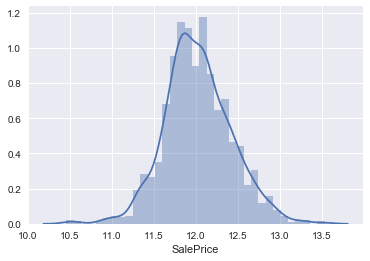

In [27]:
sns.distplot(df_raw.SalePrice)

So there is a lot of emptyness in some of the columns< So we are dropping them as of now to make analysis easier

In [28]:
os.makedirs('tmp', exist_ok=True)
df_raw.to_feather('tmp/house-raw')

In [29]:
df, y, nas, mapper = proc_df(df_raw, 'SalePrice', do_scale=True)

In [30]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [31]:
nas

{'GarageYrBlt': 1980.0, 'LotFrontage': 69.0, 'MasVnrArea': 0.0}

In [32]:
mapper

DataFrameMapper(default=False, df_out=False,
        features=[(['Id'], StandardScaler(copy=True, with_mean=True, with_std=True)), (['MSSubClass'], StandardScaler(copy=True, with_mean=True, with_std=True)), (['LotFrontage'], StandardScaler(copy=True, with_mean=True, with_std=True)), (['LotArea'], StandardScaler(copy=True, with_mean=True, with_std=True...ue, with_std=True)), (['GarageYrBlt_na'], StandardScaler(copy=True, with_mean=True, with_std=True))],
        input_df=False, sparse=False)

**We now have something we can pass to a random forest! Huraaahhh!!!!**

In [33]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(df, y)
m.score(df,y)

0.9758128443218127

In [34]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

n_valid = 50
n_trn = len(df)-n_valid
raw_train, raw_valid = split_vals(df_raw, n_trn)
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)
X_train.shape, y_train.shape, X_valid.shape

((1410, 83), (1410,), (50, 83))

## RF

**Base model**

**Let's try our model again, this time with separate training and validation sets.**

In [35]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)
    return(res)

In [36]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
res = print_score(m)

Wall time: 306 ms
[0.06474951199637222, 0.1647686274869459, 0.97387114472454328, 0.79303200552326414]


2nd is root mean square logloss on Prices, 3rd is r^2 of Training set, 4th is r^2 of Validation Set

In [37]:
res

[0.06474951199637222,
 0.1647686274869459,
 0.97387114472454328,
 0.79303200552326414]

In [38]:
def display_score(res):
    print('Train Loss:{:.9f}, LogLoss on y {:.9f}, R2 Train {:.9f}, R2 Valid {:.9f}'.format(res[0], res[1], res[2],res[3]))
display_score(res)

Train Loss:0.064749512, LogLoss on y 0.164768627, R2 Train 0.973871145, R2 Valid 0.793032006


In [39]:
m = RandomForestRegressor(n_estimators=1, max_depth=3, bootstrap=False, n_jobs=-1)
m.fit(X_train, y_train)
res = print_score(m)
display_score(res)

[0.21492875926196187, 0.23028936202931524, 0.71210345869543923, 0.59570171737698296]
Train Loss:0.214928759, LogLoss on y 0.230289362, R2 Train 0.712103459, R2 Valid 0.595701717


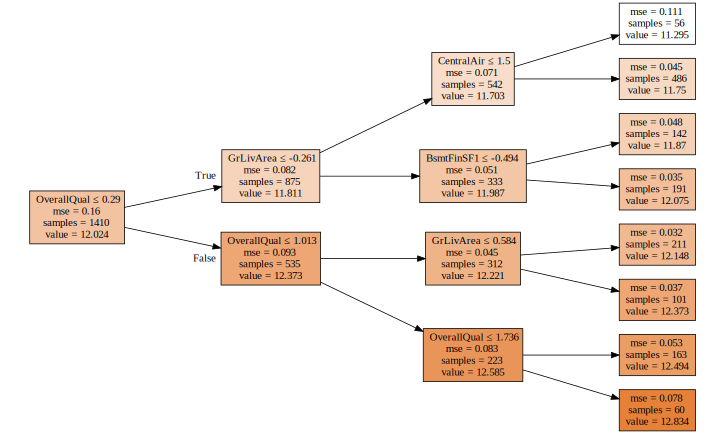

In [40]:
draw_tree(m.estimators_[0], X_train, precision=3)

## Feature Imortances

In [41]:
fi = rf_feat_importance(m, df); fi[:10]

,cols,imp
17,OverallQual,0.789116
46,GrLivArea,0.125078
41,CentralAir,0.064568
34,BsmtFinSF1,0.021239
54,TotRmsAbvGrd,0.000000
60,GarageFinish,0.000000
59,GarageYrBlt,0.000000
58,GarageType,0.000000
57,FireplaceQu,0.000000
56,Fireplaces,0.000000


Seems Like Only few of the columns drive the predictions..

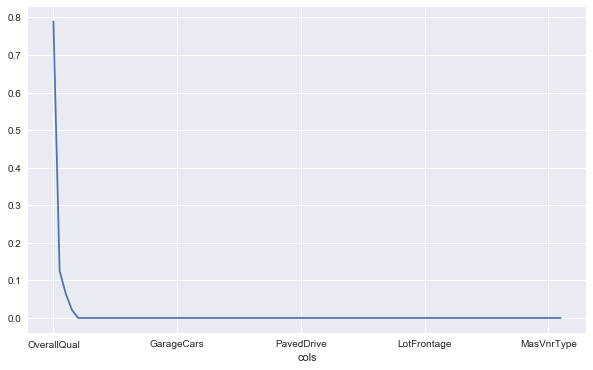

In [42]:
fi.plot('cols', 'imp', figsize=(10,6), legend=False);

In [43]:
def plot_fi(fi): 
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

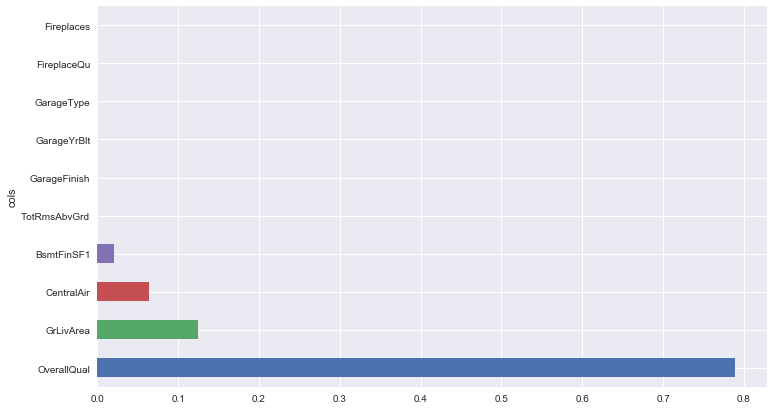

In [44]:
plot_fi(fi[:10]);

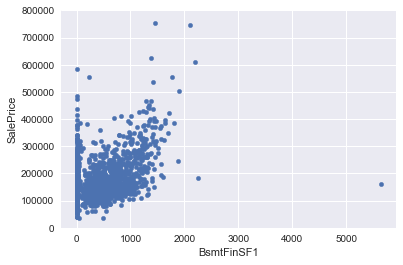

In [53]:
#scatter plot BsmtFinSF!/saleprice
var = 'BsmtFinSF1'
data = pd.concat([np.exp(df_raw['SalePrice']), df_raw[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

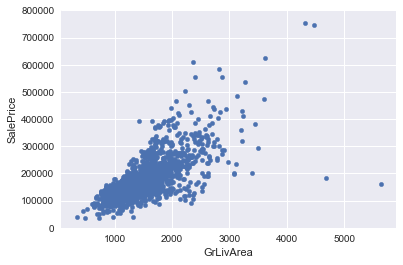

In [49]:
#scatter plot grlivarea/saleprice
var = 'GrLivArea'
data = pd.concat([np.exp(df_raw['SalePrice']), df_raw[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


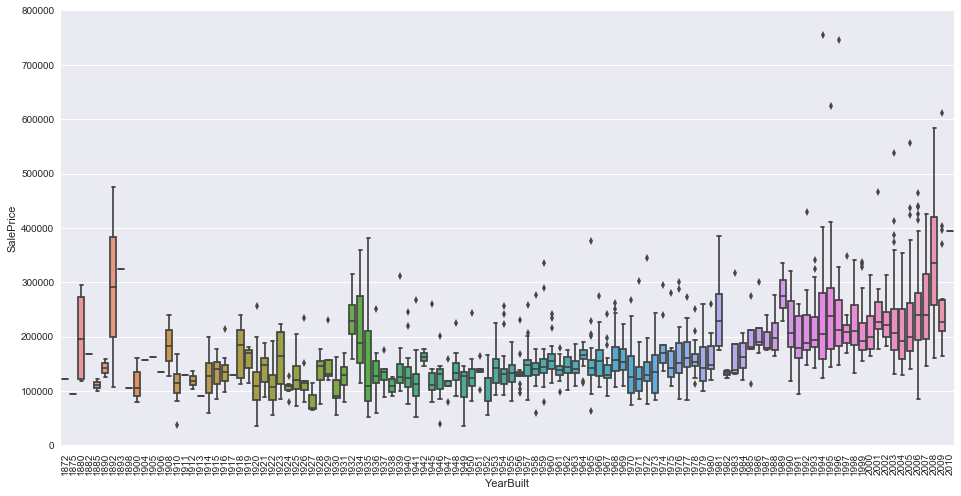

In [50]:
var = 'YearBuilt'
data = pd.concat([np.exp(df_raw['SalePrice']), df_raw[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


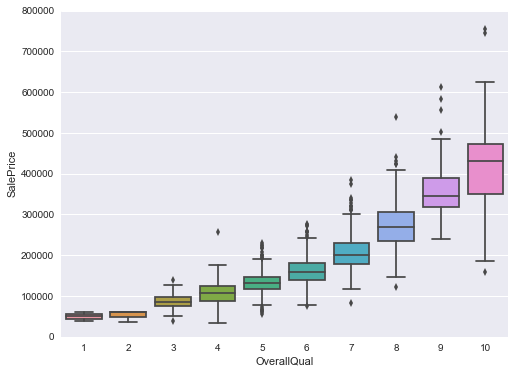

In [51]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([np.exp(df_raw['SalePrice']), df_raw[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

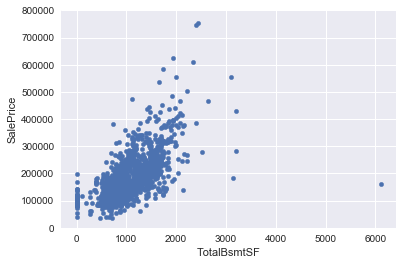

In [52]:
#scatter plot totalbsmtsf/saleprice
var = 'TotalBsmtSF'
data = pd.concat([np.exp(df_raw['SalePrice']), df_raw[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

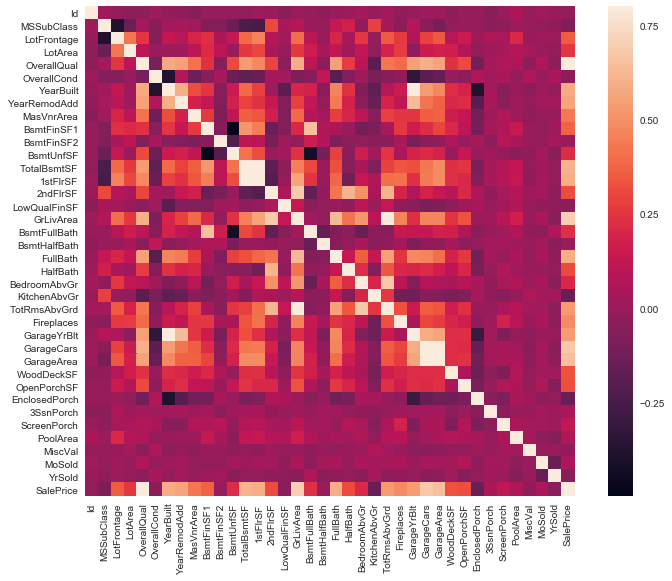

In [54]:
#correlation matrix
corrmat = df_raw.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

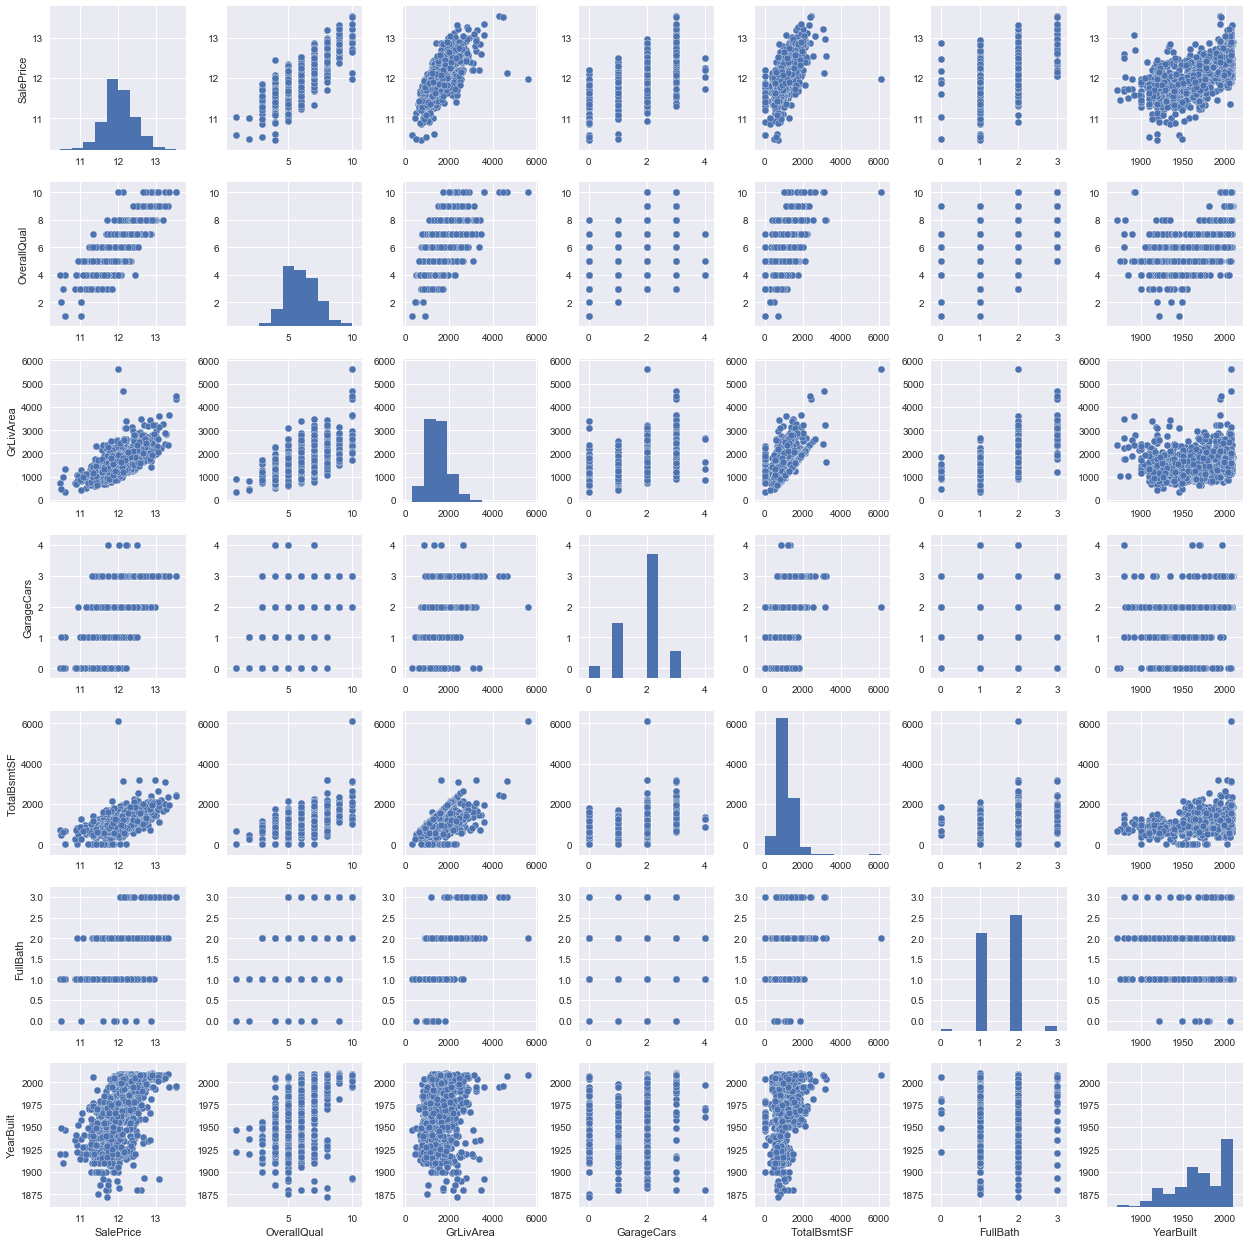

In [55]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_raw[cols], size = 2.5)
plt.show();

In [56]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5,
                          n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
_ = print_score(m)

[0.07668957203697367, 0.1377578904064258, 0.96334611502413203, 0.85532712562009561, 0.86753854493295735]


## Removing Reduntant Features(in progress)

In [57]:
from scipy.cluster import hierarchy as hc

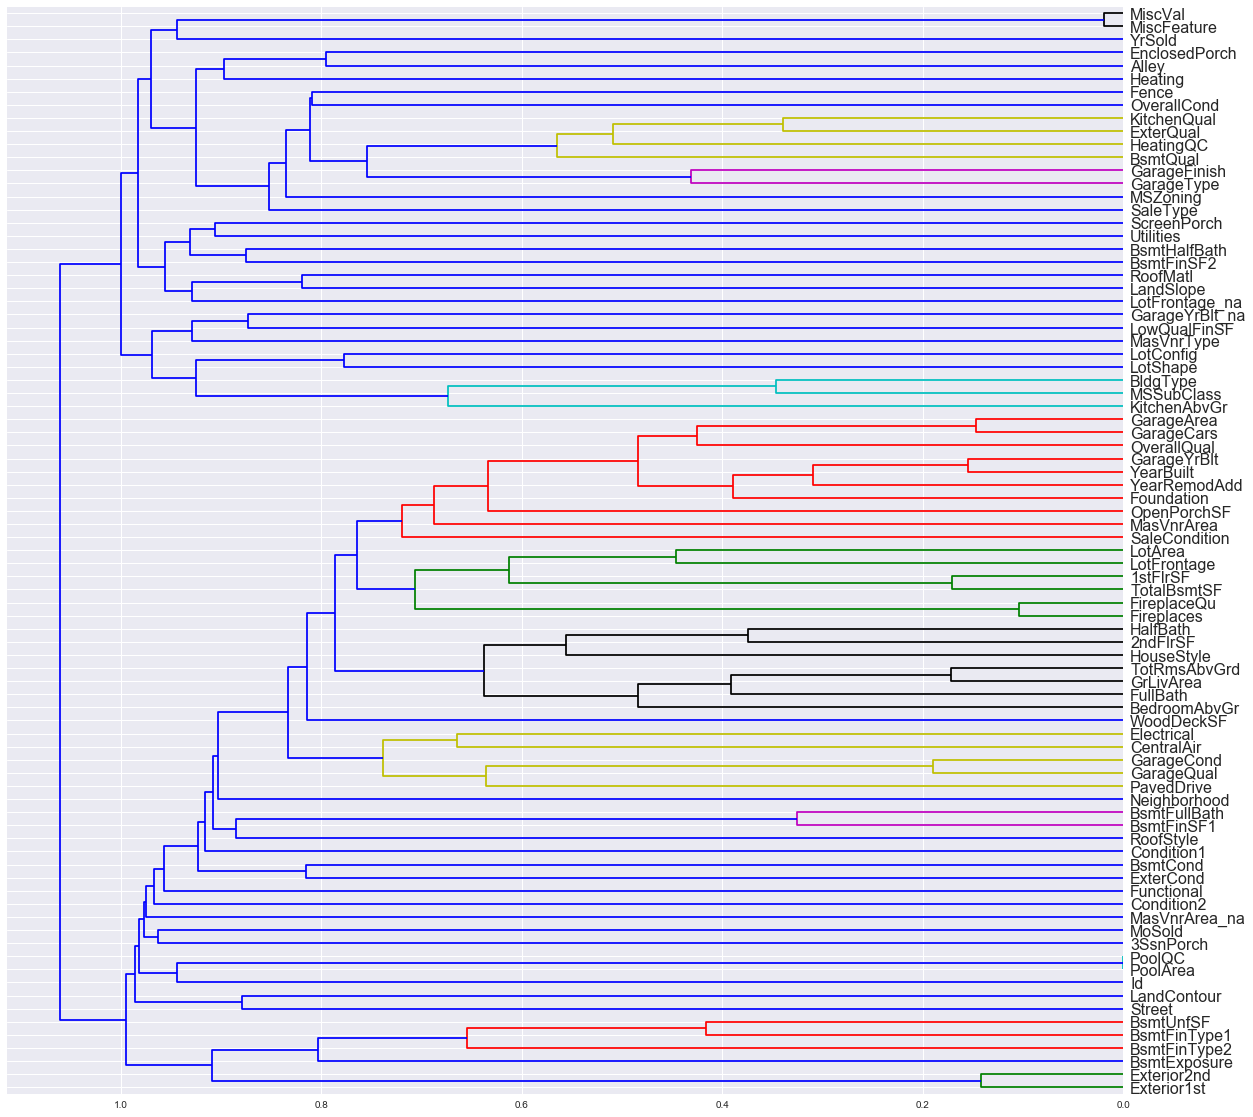

In [58]:
corr = np.round(scipy.stats.spearmanr(df).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(20,20))
dendrogram = hc.dendrogram(z, labels=df.columns, orientation='left', leaf_font_size=16)
plt.show()

In [59]:
def get_oob(df):
    m = RandomForestRegressor(n_estimators=30, min_samples_leaf=5, max_features=0.6, n_jobs=-1, oob_score=True)
    x, _ = split_vals(df, n_trn)
    m.fit(x, y_train)
    return m.oob_score_

In [60]:
get_oob(df)

0.86233850732784001

## Final Model

In [61]:
m = RandomForestRegressor(n_estimators=160, max_features=0.5, n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

Wall time: 1.08 s
[0.05115700084123155, 0.13635130337056348, 0.98368986578067175, 0.85826642860585223, 0.88206573004360966]


[0.05115700084123155,
 0.13635130337056348,
 0.98368986578067175,
 0.85826642860585223,
 0.88206573004360966]

## Lets bring the test set up now

In [62]:
df_test_raw = pd.read_csv(f'{PATH}Test (1).csv', low_memory=False)

In [72]:
df_test_raw["s"]= df_raw.SalePrice[:1459]

In [74]:
train_cats(df_test_raw)

In [75]:
test_df, _ , nas, mapper = proc_df(df_test_raw, y_fld='s', do_scale=True, mapper=mapper, na_dict=nas)

In [89]:
test_df.describe()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,...,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,3.462916,0.011377,4.015764,-0.055315,-0.069922,1.995888,0.098698,2.952707,3.776559,0.998629,...,0.476354,0.099383,0.029597,-0.080563,-0.034684,8.463331,4.787526,-0.057097,0.065044,-0.008816
std,0.999658,1.010897,0.715610,0.933772,0.496652,0.064018,0.373861,1.410751,0.701340,0.037012,...,1.022361,0.530671,1.271909,1.007301,0.980492,1.649040,1.055436,0.949169,1.366933,0.983028
min,1.733238,-0.872563,0.000000,-2.219047,-0.906691,1.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,-0.087688,-1.969111,-1.367655,0.000000,1.000000,-0.464385,-0.074227,-0.242360
25%,2.598077,-0.872563,4.000000,-0.447940,-0.313277,2.000000,0.000000,1.000000,4.000000,1.000000,...,0.000000,0.000000,-0.087688,-0.859110,-0.614439,9.000000,5.000000,-0.464385,-0.074227,-0.242360
50%,3.462916,-0.163109,4.000000,-0.039223,-0.112031,2.000000,0.000000,4.000000,4.000000,1.000000,...,0.000000,0.000000,-0.087688,-0.119110,0.138777,9.000000,5.000000,-0.464385,-0.074227,-0.242360
75%,4.327755,0.309859,4.000000,0.369494,0.100289,2.000000,0.000000,4.000000,4.000000,1.000000,...,0.000000,0.000000,-0.087688,0.620891,0.891994,9.000000,5.000000,-0.464385,-0.074227,-0.242360
max,5.192595,3.147673,5.000000,5.909878,4.618549,2.000000,2.000000,4.000000,4.000000,1.000000,...,4.000000,3.000000,34.189748,2.100892,1.645210,9.000000,6.000000,2.153385,13.472194,4.126099


In [80]:
m.n_features_

83

In [87]:
test_df.drop(['BsmtFinSF1_na','BsmtFinSF2_na', 'BsmtUnfSF_na', 'TotalBsmtSF_na', 'BsmtFullBath_na',
               'BsmtHalfBath_na', 'GarageCars_na', 'GarageArea_na'],axis=1,inplace=True)

In [83]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [88]:
test_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [91]:
y_preds = m.predict(test_df)

In [93]:
df__ = pd.read_csv(f'{PATH}Test (1).csv', low_memory=False)

In [94]:
ids = df__.Id

In [96]:
dic = {'Id':ids,'SalePrice':np.exp(y_preds)}

In [98]:
df_sub = pd.DataFrame(dic)

In [99]:
df_sub.to_csv("sol.csv", index = False)